In [509]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader.data as web
# import statsmodels.api as sm
import statsmodels.api as sm
import pandas_datareader.data as web
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px


In [510]:
# !pip install cvxpy
import cvxpy as cp

**Data Extraction**

In [511]:
# Define the list of tickers and start and end dates
tickers=["VOO", "TAN", "VUG", "SOXX", "TECL", "CURE", "MA", "UNH", "IYE", "NOW","AVGO","TMUS","^GSPC"]
start_date=date(2018,1,1)
end_date=date(2022,12,31)
n_equities=len(tickers)
# Download the historical data for the tickers from Yahoo Finance
df=yf.download(tickers,start_date,end_date)['Adj Close']


[*********************100%***********************]  13 of 13 completed


In [512]:
df.head(2)


AVGO       CURE        IYE          MA         NOW  \
Date                                                                   
2018-01-02  219.429092  46.999393  32.300877  147.381744  131.729996   
2018-01-03  221.828751  48.284645  32.773529  149.234848  132.910004   

                  SOXX        TAN       TECL       TMUS         UNH  \
Date                                                                  
2018-01-02  164.338272  25.410534  11.379037  64.040001  204.824692   
2018-01-03  167.211990  25.707266  11.658770  63.610001  206.973343   

                   VOO         VUG        ^GSPC  
Date                                             
2018-01-02  225.307617  136.034119  2695.810059  
2018-01-03  226.648010  137.305984  2713.060059

In [513]:
df.tail(2)

AVGO        CURE        IYE          MA         NOW  \
Date                                                                    
2022-12-29  553.823853  115.581123  45.774189  347.101257  389.850006   
2022-12-30  555.134399  114.148804  46.071491  346.622772  388.269989   

                  SOXX        TAN       TECL        TMUS        UNH  \
Date                                                                  
2022-12-29  347.424561  73.080002  22.146996  139.399994  527.99939   
2022-12-30  347.105408  72.940002  22.047235  140.000000  528.29834   

                   VOO         VUG        ^GSPC  
Date                                             
2022-12-29  350.865356  213.315521  3849.280029  
2022-12-30  349.899323  212.726593  3839.500000

In [514]:
# Calculate daily percentage returns for each ticker

returns = df.pct_change().dropna()



In [515]:
# Drop the returns of the market index (^GSPC)
returns = returns.drop(columns='^GSPC')


In [516]:
# Calculate the market returns
market_returns = df['^GSPC'].pct_change().dropna()



**APR and APY**

In [517]:
# Calculate the number of trading days per year and the total number of trading days for each ticker
tr_days_per_year = {}
N_total = {}
for ticker in tickers:
    trading_days = df[ticker].count()
    tr_days_per_year[ticker] = df[ticker].groupby([df[ticker].index.year]).agg('count')
    N_total[ticker] = trading_days

# Create a DataFrame from the dictionaries
df_tr_days_per_year = pd.DataFrame(tr_days_per_year)
df_N_total = pd.DataFrame.from_dict(N_total, orient='index', columns=['Total'])


In [518]:
df_tr_days_per_year

VOO  TAN  VUG  SOXX  TECL  CURE   MA  UNH  IYE  NOW  AVGO  TMUS  ^GSPC
Date                                                                        
2018  251  251  251   251   251   251  251  251  251  251   251   251    251
2019  252  252  252   252   252   252  252  252  252  252   252   252    252
2020  253  253  253   253   253   253  253  253  253  253   253   253    253
2021  252  252  252   252   252   252  252  252  252  252   252   252    252
2022  251  251  251   251   251   251  251  251  251  251   251   251    251

In [519]:
df_N_total

Total
VOO     1259
TAN     1259
VUG     1259
SOXX    1259
TECL    1259
CURE    1259
MA      1259
UNH     1259
IYE     1259
NOW     1259
AVGO    1259
TMUS    1259
^GSPC   1259

In [520]:
returns.dropna()

AVGO      CURE       IYE        MA       NOW      SOXX  \
Date                                                                     
2018-01-03  0.010936  0.027346  0.014633  0.012573  0.008958  0.017487   
2018-01-04  0.000334  0.004235  0.005622  0.012937  0.007072  0.005635   
2018-01-05  0.005925  0.026104 -0.000729  0.020730  0.008666  0.005715   
2018-01-08  0.002393 -0.011155  0.006081  0.003023  0.002148  0.007856   
2018-01-09 -0.013846  0.034435 -0.002901  0.001444  0.001109 -0.009840   
...              ...       ...       ...       ...       ...       ...   
2022-12-23 -0.001193  0.001733  0.030343  0.006090  0.005053  0.000861   
2022-12-27  0.002009 -0.007871  0.007954  0.007451 -0.003195 -0.018058   
2022-12-28 -0.015627 -0.018221 -0.024312 -0.012162 -0.012059 -0.014741   
2022-12-29  0.023711  0.031880  0.009617  0.018307  0.036697  0.031908   
2022-12-30  0.002366 -0.012392  0.006495 -0.001379 -0.004053 -0.000919   

                 TAN      TECL      TMUS       UNH       VOO       VUG  
Date                                                                    
2018-01-03  0.011678  0.024583 -0.006715  0.010490  0.005949  0.009350  
2018-01-04 -0.007695  0.017198 -0.009590  0.004340  0.004385  0.002716  
2018-01-05  0.004653  0.032000  0.025397  0.019069  0.006409  0.008405  
2018-01-08  0.000772  0.010709  0.007740 -0.017357  0.002070  0.003237  
2018-01-09 -0.000386 -0.008619  0.007680  0.004983  0.002105  0.002060  
...              ...       ...       ...       ...       ...       ...  
2022-12-23 -0.013182  0.001794  0.003512  0.008006  0.005601  0.003335  
2022-12-27 -0.023778 -0.029096  0.006928  0.001280 -0.003979 -0.011328  
2022-12-28 -0.017105 -0.048870 -0.014256 -0.006654 -0.012269 -0.013115  
2022-12-29  0.017402  0.076103  0.003022  0.002706  0.017737  0.025235  
2022-12-30 -0.001916 -0.004504  0.004304  0.000566 -0.002753 -0.002761  

[1258 rows x 12 columns]

In [521]:
# corr=returns
# corr

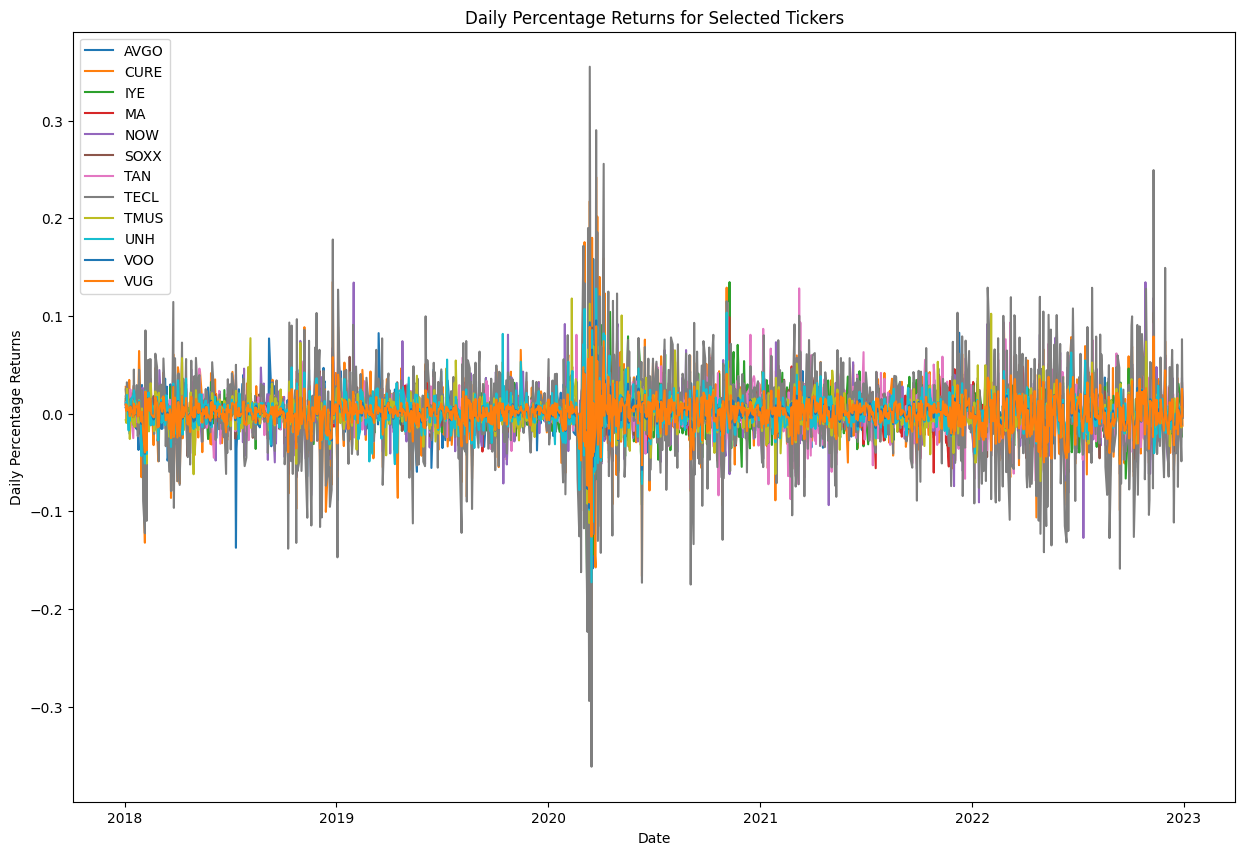

In [522]:
# Plot the daily percentage returns for each ticker
fig, ax = plt.subplots(figsize=(15,10))
for col in returns.columns:
    ax.plot(returns.index, returns[col], label=col)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Percentage Returns')
ax.set_title('Daily Percentage Returns for Selected Tickers')
ax.legend(loc='upper left')
plt.show()


In [523]:
#Annual Percentage Rate (APR) or R_nominal
APR = returns.groupby([returns.index.year]).agg('sum')
APR_avg = APR.mean()

In [524]:
APR 

AVGO      CURE       IYE        MA       NOW      SOXX       TAN  \
Date                                                                         
2018  0.059462  0.129694 -0.205827  0.262090  0.374738 -0.055447 -0.288234   
2019  0.298967  0.523205  0.115130  0.487900  0.523851  0.519391  0.546254   
2020  0.505396  0.479523 -0.225443  0.302649  0.792633  0.528519  1.360575   
2021  0.488638  0.695660  0.471692  0.051955  0.228112  0.410386 -0.177105   
2022 -0.073446 -0.070024  0.532570  0.024992 -0.359717 -0.338392  0.055902   

          TECL      TMUS       UNH       VOO       VUG  
Date                                                    
2018 -0.072519  0.024589  0.158977 -0.038941 -0.026208  
2019  1.196838  0.230471  0.214094  0.280695  0.325606  
2020  1.226801  0.625400  0.308968  0.228049  0.401240  
2021  0.921750 -0.122365  0.391397  0.261518  0.256602  
2022 -0.879668  0.231071  0.096495 -0.171490 -0.350517

In [525]:
# APR_avg
equities=tickers[:-1]

In [526]:
# Calculate APY 
n_compounded = 1  # annual compounding
APY = pd.DataFrame()
for ticker in equities:
    APY[ticker] = (1 + APR[ticker] / df_tr_days_per_year[ticker]) ** df_tr_days_per_year[ticker] - 1

# Print APY
print("Annual Percentage Yield (APY):")
# print(APY.mean())
APY

Annual Percentage Yield (APY):


VOO       TAN       VUG      SOXX      TECL      CURE        MA  \
Date                                                                         
2018 -0.038196 -0.250538 -0.025869 -0.053944 -0.069962  0.138442  0.299466   
2019  0.323843  0.725751  0.384578  0.680106  2.300273  0.686513  0.628124   
2020  0.256017  2.884249  0.493201  0.695484  2.400205  0.614571  0.353195   
2021  0.298724 -0.162360  0.292362  0.506896  1.509461  1.003111  0.053323   
2022 -0.157641  0.057487 -0.295849 -0.287247 -0.585720 -0.067637  0.025306   

           UNH       IYE       NOW      AVGO      TMUS  
Date                                                    
2018  0.172252 -0.186095  0.454204  0.061257  0.024892  
2019  0.238627  0.121990  0.687600  0.348226  0.259060  
2020  0.361762 -0.201918  1.206470  0.656807  0.867552  
2021  0.478597  0.601998  0.256096  0.629323 -0.115201  
2022  0.101283  0.702343 -0.302306 -0.070824  0.259815

In [527]:
print(APY.mean())


VOO     0.136549
TAN     0.650918
VUG     0.169685
SOXX    0.308259
TECL    1.110852
CURE    0.475000
MA      0.271883
UNH     0.270504
IYE     0.207664
NOW     0.460413
AVGO    0.324958
TMUS    0.259224
dtype: float64


In [528]:
# Calculate standard deviation of APY for each ticker
std_dev = APY.std()

In [529]:
# std_dev

**Risk vs Return**

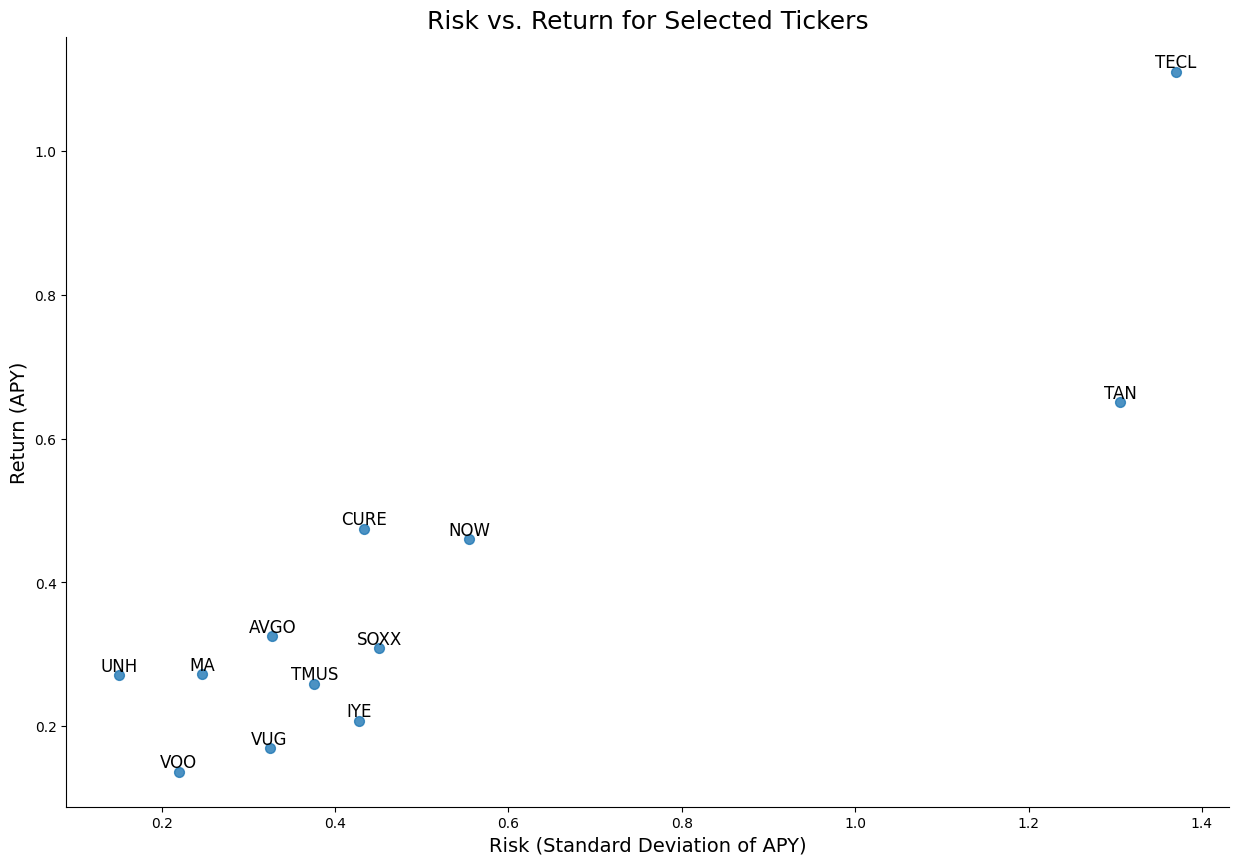

In [530]:
# Create a scatter plot of APY vs. standard deviation
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(std_dev, APY.mean(), s=50, alpha=0.8)
ax.set_xlabel("Risk (Standard Deviation of APY)", fontsize=14)
ax.set_ylabel("Return (APY)", fontsize=14)
ax.set_title("Risk vs. Return for Selected Tickers", fontsize=18)
for i, ticker in enumerate(equities):
    ax.annotate(ticker, (std_dev[i], APY.mean()[i]), fontsize=12, ha='center', va='bottom')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [531]:
#Define the ticker symbol for the risk-free rate
risk_free_ticker = "^TNX"

# Download the risk-free rate (%) from Yahoo Finance
risk_free_rate = yf.download(risk_free_ticker, start_date, end_date)['Adj Close'].mean()


[*********************100%***********************]  1 of 1 completed


In [532]:
# today = date.today()
# # Download the risk-free rate (%) from Yahoo Finance
# risk_free_rate = yf.download(risk_free_ticker, end=today)['Adj Close'].iloc[-1]

In [533]:
risk_free_rate

2.0638467022783704

In [534]:
#risk_free_rate 
print(f'Risk-Free Rate: {risk_free_rate:.5f}%')


Risk-Free Rate: 2.06385%


In [535]:
# risk_free_rate=risk_free_rate/100

In [536]:
# Convert annualized risk-free rate to daily - also coverting to number from %
risk_free_rate_daily = ((1 + risk_free_rate)**(1/252) - 1)/100


In [537]:
#risk_free_rate daily
# print(f'Risk-Free Rate: {100 * risk_free_rate_daily:.5f}%')


In [538]:
# Calculate the betas for each equity
betas = pd.Series(index=tickers)
for ticker in equities:
    cov = returns[ticker].cov(market_returns)
    var = market_returns.var()
    beta = cov/var
    betas[ticker] = beta

# print(betas)

<ipython-input-538-2ce4ac5dda87>:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [539]:
# Drop the last ticker from the betas series
betas = betas[:-1]

# Convert the betas series to a dictionary
betas_dict = betas.to_dict()
betas_dict

{'VOO': 0.9978468327060441,
 'TAN': 1.1757824773797694,
 'VUG': 1.10555433850915,
 'SOXX': 1.3852273254211138,
 'TECL': 3.5524218274885166,
 'CURE': 2.332289491339018,
 'MA': 1.2239875035169607,
 'UNH': 0.9184833644946857,
 'IYE': 1.0863099592142687,
 'NOW': 1.3178071150235366,
 'AVGO': 1.2669446066106342,
 'TMUS': 0.8028107627874437}

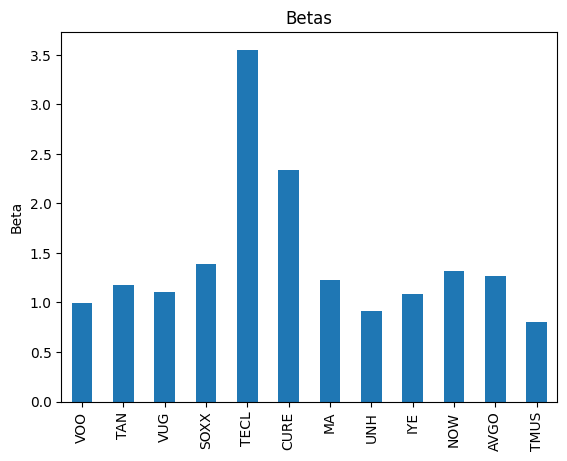

In [631]:
betas.plot(kind='bar')
plt.title("Betas")
plt.ylabel("Beta")
plt.show()

**ALPHA**

In [610]:
benchmark=benchmark = pd.DataFrame(market_returns)


In [612]:
benchmark_apr=benchmark.groupby([returns.index.year]).agg('sum')
benchmark_apr

^GSPC
Date          
2018 -0.058224
2019  0.261588
2020  0.210538
2021  0.246839
2022 -0.187106

In [620]:
Alpha = APR.subtract(benchmark_apr.iloc[:, 0], axis=0)

In [625]:
Alpha

AVGO      CURE       IYE        MA       NOW      SOXX       TAN  \
Date                                                                         
2018  0.117686  0.187919 -0.147603  0.320315  0.432962  0.002777 -0.230010   
2019  0.037379  0.261617 -0.146458  0.226312  0.262263  0.257804  0.284666   
2020  0.294858  0.268985 -0.435981  0.092111  0.582095  0.317981  1.150037   
2021  0.241798  0.448820  0.224853 -0.194884 -0.018728  0.163546 -0.423944   
2022  0.113660  0.117082  0.719676  0.212098 -0.172611 -0.151286  0.243007   

          TECL      TMUS       UNH       VOO       VUG  
Date                                                    
2018 -0.014295  0.082813  0.217201  0.019283  0.032016  
2019  0.935251 -0.031117 -0.047494  0.019107  0.064018  
2020  1.016262  0.414862  0.098430  0.017510  0.190702  
2021  0.674910 -0.369204  0.144558  0.014678  0.009763  
2022 -0.692562  0.418177  0.283601  0.015615 -0.163411

In [624]:
Alpha_mean=Alpha.mean()

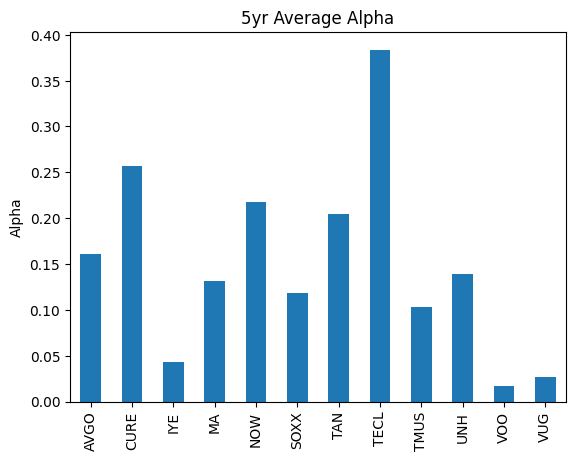

In [629]:
ax=Alpha_mean.plot(kind='bar')
ax.set_title("5yr Average Alpha")
ax.set_ylabel("Alpha")
plt.show()

**Calculating EPR Based on Historical Data**

In [540]:
# Define the list of tickers and start and end dates
symbols=['^TNX','^GSPC']
start_date_epr=date(2017,1,1)
end_date_epr=date(2022,12,31)

In [541]:
#Download the adjusted close prices for the specified symbols and date range

erp = yf.download(symbols, start=start_date_epr,end=end_date_epr)['Adj Close']


[*********************100%***********************]  2 of 2 completed


In [542]:
# Resample data to yearly frequency and select the last row
erp_yearly = erp.resample('Y').last()


In [543]:
# Divide yield on TNX by 100 to standardize it
erp_yearly['^TNX'] = erp_yearly['^TNX'] / 100


In [544]:
# Calculate the annual nominal return on ^GSPC and add it as a new column
erp_yearly['GSPC_APR'] = (erp_yearly['^GSPC'] - erp_yearly['^GSPC'].shift(1)) / erp_yearly['^GSPC'].shift(1)
# # Calculate the annual percentage yield on ^GSPC and add it as a new column
# erp_monthly['GSPC_APY'] = (1 + erp_monthly['GSPC_Monthly Return']) ** 12 - 1


In [545]:
#Calculate the spread between the returns of the S&P 500 index and the daily yields of the 10-year Treasury note (^TNX)
erp_yearly['Spread']=erp_yearly['GSPC_APR']-erp_yearly['^TNX']

In [546]:
erp_yearly.dropna(inplace=True)

In [547]:
erp_yearly

^GSPC     ^TNX  GSPC_APR    Spread
Date                                                
2018-12-31  2506.850098  0.02686 -0.062373 -0.089233
2019-12-31  3230.780029  0.01919  0.288781  0.269591
2020-12-31  3756.070068  0.00917  0.162589  0.153419
2021-12-31  4766.180176  0.01512  0.268927  0.253807
2022-12-31  3839.500000  0.03879 -0.194428 -0.233218

**Setting EPR based on Damadoran's Model**

In [548]:
erp_y=0.0598

In [549]:
erp_d=(1+erp_y)**(1/252)-1
# print(f'EPR: {100 * erp_annual:.5f}%')


**Expected Return on Asset through CAPM**

In [550]:
# Calculate the expected returns and alphas
expected_returns = pd.DataFrame(index=equities, columns=['Expected Return'])
#alpha_df = pd.DataFrame(index=equities, columns=['Alpha'])
for ticker in equities:
    expected_returns.loc[ticker, 'Expected Return'] = risk_free_rate_daily + betas[ticker] * erp_d

In [551]:
annualized_market_return=(1+market_returns.mean())**252-1
# annualized_market_return

In [552]:
# Convert the expected returns to annualized compounded returns
exp_returns = pd.DataFrame(expected_returns, columns=['Expected Return'])
exp_returns['Expected Return Annualized'] = (1 + exp_returns['Expected Return']) ** 252 - 1

In [553]:
# print(exp_returns)

In [554]:
# Set a random seed for reproducibility
np.random.seed(42)
n_equities=len(equities)

In [555]:
# expected_returns
# risk_free_rate_daily

In [556]:
expected_returns=exp_returns['Expected Return']
# expected_returns

In [557]:
# Calculate the covariance matrix
covariance_matrix = np.cov(returns.T)

# Simulate 50,000 randomly chosen portfolios that put different weights in
# each of the stocks above and calculate the expected return, standard deviation,
# and Sharpe ratio of those portfolios
n_simulations = 50000
np.random.seed(123)
simulation_results = np.zeros((n_simulations, n_equities + 3))
for i in range(n_simulations):
    # Generate random weights for the portfolio
    weights = np.random.rand(n_equities)
    weights /= np.sum(weights)

    # Calculate the expected return and standard deviation of the portfolio
    expected_return = np.dot(weights, expected_returns)
    standard_deviation = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    sharpe_ratio = (expected_return - risk_free_rate_daily) / standard_deviation

    # Store the results in the simulation_results array
    simulation_results[i, 0] = expected_return
    simulation_results[i, 1] = standard_deviation
    simulation_results[i, 2] = sharpe_ratio
    simulation_results[i, 3:] = weights

# Create a dataframe of the simulation results
columns = ['Expected Return', 'Standard Deviation', 'Sharpe Ratio'] + equities
simulation_df = pd.DataFrame(simulation_results, columns=columns)


In [558]:
simulation_df

Expected Return  Standard Deviation  Sharpe Ratio       VOO       TAN  \
0             0.000380            0.021054      0.015928  0.106915  0.043925   
1             0.000334            0.018642      0.015540  0.074652  0.010158   
2             0.000372            0.020426      0.016045  0.152139  0.068012   
3             0.000353            0.019866      0.015552  0.062489  0.130942   
4             0.000389            0.019356      0.017790  0.081698  0.096389   
...                ...                 ...           ...       ...       ...   
49995         0.000330            0.018530      0.015410  0.044540  0.140640   
49996         0.000337            0.022873      0.012782  0.028976  0.186376   
49997         0.000369            0.018780      0.017299  0.133154  0.010448   
49998         0.000368            0.023978      0.013500  0.098674  0.100758   
49999         0.000346            0.021979      0.013737  0.101103  0.065790   

            VUG      SOXX      TECL      CURE        MA       UNH       IYE  \
0      0.034824  0.084632  0.110446  0.064951  0.150557  0.105128  0.073828   
1      0.067753  0.125618  0.031063  0.029865  0.090478  0.090525  0.107985   
2      0.076189  0.048070  0.061853  0.132877  0.019396  0.091333  0.090735   
3      0.138384  0.073553  0.091451  0.016946  0.046504  0.060800  0.126973   
4      0.018971  0.129957  0.094842  0.085722  0.053906  0.047829  0.065584   
...         ...       ...       ...       ...       ...       ...       ...   
49995  0.173544  0.016692  0.020204  0.020012  0.127727  0.020292  0.042172   
49996  0.023494  0.105569  0.029734  0.044311  0.135480  0.115054  0.089125   
49997  0.049428  0.148329  0.049525  0.146636  0.002474  0.064948  0.088956   
49998  0.037077  0.044288  0.080510  0.085834  0.109730  0.180002  0.184599   
49999  0.119779  0.053530  0.025518  0.148032  0.036407  0.136920  0.079388   

            NOW      AVGO      TMUS  
0      0.060194  0.052681  0.111917  
1      0.144586  0.123313  0.104005  
2      0.103965  0.089675  0.065759  
3      0.036709  0.070797  0.144451  
4      0.107147  0.137682  0.080273  
...         ...       ...       ...  
49995  0.152641  0.171874  0.069662  
49996  0.138262  0.011594  0.092025  
49997  0.126796  0.034304  0.145002  
49998  0.021204  0.053361  0.003962  
49999  0.050763  0.040794  0.141977  

[50000 rows x 15 columns]

In [559]:
annualized_simulation_df = simulation_df.copy()
annualized_simulation_df["Expected Return"] = (1+simulation_df["Expected Return"])**(252) -1
annualized_simulation_df["Standard Deviation"] = simulation_df["Standard Deviation"] * np.sqrt(252)
annualized_simulation_df["Sharpe Ratio"]=(annualized_simulation_df["Expected Return"]-risk_free_rate/100)/annualized_simulation_df["Standard Deviation"]
annualized_simulation_df["Volatility"] = annualized_simulation_df["Standard Deviation"] **2

In [560]:
annualized_simulation_df

Expected Return  Standard Deviation  Sharpe Ratio       VOO       TAN  \
0             0.100442            0.334223      0.238773  0.106915  0.043925   
1             0.087859            0.295926      0.227153  0.074652  0.010158   
2             0.098334            0.324259      0.239608  0.152139  0.068012   
3             0.093148            0.315357      0.229926  0.062489  0.130942   
4             0.102941            0.307272      0.267849  0.081698  0.096389   
...                ...                 ...           ...       ...       ...   
49995         0.086726            0.294160      0.224664  0.044540  0.140640   
49996         0.088587            0.363098      0.187135  0.028976  0.186376   
49997         0.097546            0.298130      0.257966  0.133154  0.010448   
49998         0.097220            0.380636      0.201194  0.098674  0.100758   
49999         0.091214            0.348910      0.202275  0.101103  0.065790   

            VUG      SOXX      TECL      CURE        MA       UNH       IYE  \
0      0.034824  0.084632  0.110446  0.064951  0.150557  0.105128  0.073828   
1      0.067753  0.125618  0.031063  0.029865  0.090478  0.090525  0.107985   
2      0.076189  0.048070  0.061853  0.132877  0.019396  0.091333  0.090735   
3      0.138384  0.073553  0.091451  0.016946  0.046504  0.060800  0.126973   
4      0.018971  0.129957  0.094842  0.085722  0.053906  0.047829  0.065584   
...         ...       ...       ...       ...       ...       ...       ...   
49995  0.173544  0.016692  0.020204  0.020012  0.127727  0.020292  0.042172   
49996  0.023494  0.105569  0.029734  0.044311  0.135480  0.115054  0.089125   
49997  0.049428  0.148329  0.049525  0.146636  0.002474  0.064948  0.088956   
49998  0.037077  0.044288  0.080510  0.085834  0.109730  0.180002  0.184599   
49999  0.119779  0.053530  0.025518  0.148032  0.036407  0.136920  0.079388   

            NOW      AVGO      TMUS  Volatility  
0      0.060194  0.052681  0.111917    0.111705  
1      0.144586  0.123313  0.104005    0.087572  
2      0.103965  0.089675  0.065759    0.105144  
3      0.036709  0.070797  0.144451    0.099450  
4      0.107147  0.137682  0.080273    0.094416  
...         ...       ...       ...         ...  
49995  0.152641  0.171874  0.069662    0.086530  
49996  0.138262  0.011594  0.092025    0.131840  
49997  0.126796  0.034304  0.145002    0.088881  
49998  0.021204  0.053361  0.003962    0.144884  
49999  0.050763  0.040794  0.141977    0.121738  

[50000 rows x 16 columns]

In [561]:
# annualized_simulation_df

In [562]:
# # Find the row with the maximum Sharpe Ratio
# max_sharpe_ratio_row = annualized_simulation_df.loc[annualized_simulation_df['Sharpe Ratio'].idxmax()]

# # Extract the values for standard deviation and expected return
# max_sharpe_ratio_std_dev = max_sharpe_ratio_row['Standard Deviation']
# max_sharpe_ratio_return = max_sharpe_ratio_row['Expected Return']

# # Create the scatter plot with markers for max Sharpe Ratio and minimum standard deviation
# fig, ax = plt.subplots(figsize=(10, 6))
# annualized_simulation_df.plot(kind='scatter', x='Standard Deviation',
#                               y='Expected Return', c='Sharpe Ratio',
#                               cmap='RdYlGn', edgecolors='black',
#                               ax=ax)
# ax.scatter(x=max_sharpe_ratio_std_dev, y=max_sharpe_ratio_return,
#            c='black', marker='*', s=200, label='Max Sharpe Ratio')
# # ax.scatter(x=min_std_dev_std_dev, y=min_std_dev_return,
# #            c='black', marker='o', s=200, label='Minimum Volatility')
# ax.set(xlabel='Standard Deviation', ylabel='Expected Return', 
#        title='Efficient Frontier')
# ax.legend()
# plt.tight_layout()


# plt.show()


**Maximum Sharpe Ratio portfolio**

In [563]:
# max_sharpe_ratio_row

In [564]:
# Find the index of the portfolio with the maximum Sharpe ratio and minimum volatility
max_sharpe_ind = np.argmax(annualized_simulation_df['Sharpe Ratio'])
# Select the portfolio with the maximum Sharpe ratio
max_sharpe_portf = annualized_simulation_df.loc[max_sharpe_ind]

# Find the index of the portfolio with the minimum volatility
min_stddev_ind = np.argmin(annualized_simulation_df['Standard Deviation'])
# Select the portfolio with the minimum volatility
min_vol_portf = annualized_simulation_df.loc[min_stddev_ind]


# Retrieve the portfolio weights for the maximum Sharpe ratio and minimum volatility portfolios
max_sharpe_weights = annualized_simulation_df.iloc[max_sharpe_ind, 3:].values
min_vol_weights = annualized_simulation_df.iloc[min_stddev_ind, 3:].values

# Find the index of the portfolio with the maximum return
max_ret_ind = np.argmax(annualized_simulation_df['Expected Return'])

# Select the portfolio with the maximum return
max_ret_portf = annualized_simulation_df.loc[max_ret_ind]

# Find the index of the portfolio with the maximum return
min_ret_ind = np.argmin(annualized_simulation_df['Expected Return'])

# Select the portfolio with the maximum return
min_ret_portf = annualized_simulation_df.loc[min_ret_ind]


# Print the maximum Sharpe ratio portfolio weights
print('Maximum Sharpe Ratio portfolio ----')
print('Weights')
for x, y in zip(equities, max_sharpe_weights):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)
print(f'\nExpected Return: {annualized_simulation_df.iloc[max_sharpe_ind,0]:.2%}')
print(f'Standard Deviation: {annualized_simulation_df.iloc[max_sharpe_ind,1]:.2%}')
print(f'Sharpe Ratio: {annualized_simulation_df.iloc[max_sharpe_ind,2]:.2%}')

# Print the minimum volatility portfolio weights
print('\n\nMinimum Volatility portfolio ----')
print('Weights')
for x, y in zip(equities, min_vol_weights):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)
print(f'\nExpected Return: {annualized_simulation_df.iloc[min_stddev_ind,0]:.2%}')
print(f'Standard Deviation: {annualized_simulation_df.iloc[min_stddev_ind,1]:.2%}')
print(f'Sharpe Ratio: {annualized_simulation_df.iloc[min_stddev_ind,2]:.2%}')

Maximum Sharpe Ratio portfolio ----
Weights
VOO: 4.08% TAN: 3.77% VUG: 3.04% SOXX: 9.03% TECL: 22.67% CURE: 19.41% MA: 1.43% UNH: 0.97% IYE: 15.06% NOW: 9.51% AVGO: 10.87% TMUS: 0.16% 
Expected Return: 13.29%
Standard Deviation: 28.58%
Sharpe Ratio: 39.30%


Minimum Volatility portfolio ----
Weights
VOO: 0.73% TAN: 0.36% VUG: 3.58% SOXX: 18.76% TECL: 6.53% CURE: 0.92% MA: 2.28% UNH: 0.15% IYE: 14.09% NOW: 29.27% AVGO: 15.52% TMUS: 7.82% 
Expected Return: 9.64%
Standard Deviation: 24.23%
Sharpe Ratio: 31.27%


In [565]:
# Define the data
additional_results = {
    'Portfolio': ['Maximum Sharpe Ratio', 'Minimum Volatility', 'Maximum Return', 'Minimum Return'],
    'Returns': [max_sharpe_portf['Expected Return'], min_vol_portf['Expected Return'], max_ret_portf['Expected Return'], min_ret_portf['Expected Return']],
    'Volatility': [max_sharpe_portf['Standard Deviation'], min_vol_portf['Standard Deviation'], max_ret_portf['Standard Deviation'], min_ret_portf['Standard Deviation']],
    'Sharpe Ratio': [max_sharpe_portf['Sharpe Ratio'], min_vol_portf['Sharpe Ratio'], max_ret_portf['Sharpe Ratio'], min_ret_portf['Sharpe Ratio']]
}

# Create a Pandas DataFrame
additional_results = pd.DataFrame(additional_results)

# Set the index to the "Portfolio" column
additional_results.set_index('Portfolio', inplace=True)

In [566]:
additional_results

Returns  Volatility  Sharpe Ratio
Portfolio                                               
Maximum Sharpe Ratio  0.132939    0.285777      0.392965
Minimum Volatility    0.096422    0.242338      0.312717
Maximum Return        0.137831    0.339840      0.344848
Minimum Return        0.075852    0.358231      0.154127

In [567]:
# annualized_simulation_df.head(1)

In [568]:
# max_sharpe_portf

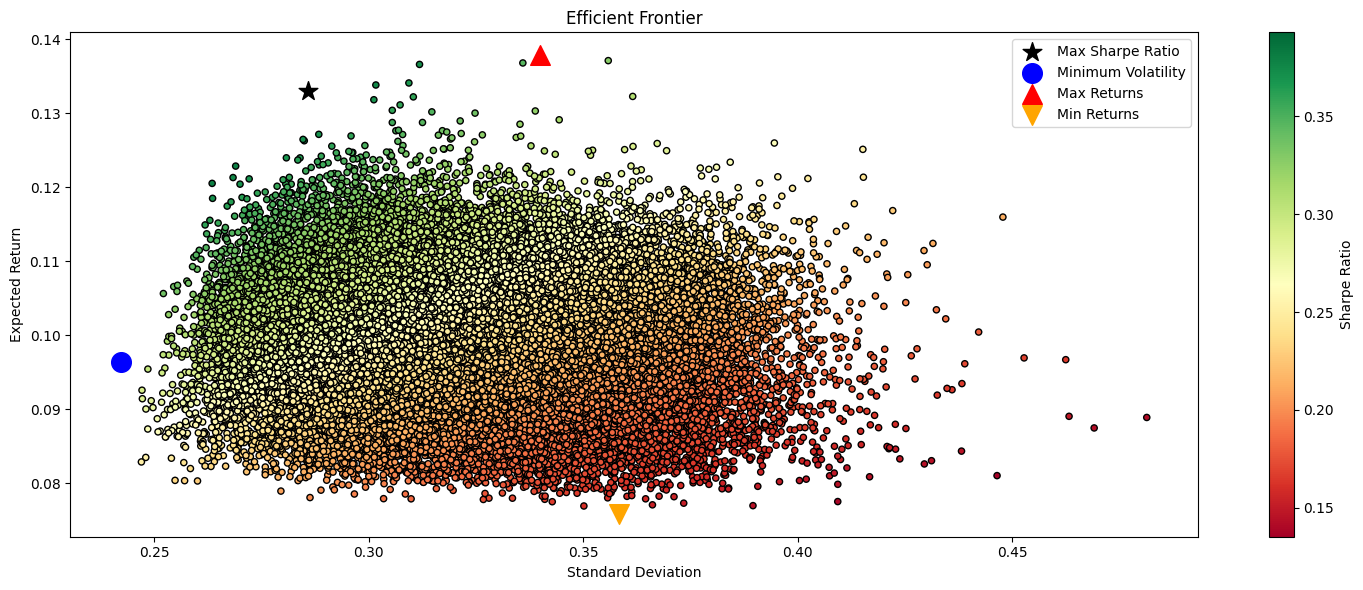

In [569]:
fig, ax = plt.subplots(figsize=(15, 6))

# scatter plot of all portfolios
annualized_simulation_df.plot(kind='scatter', x='Standard Deviation', 
                              y='Expected Return', c='Sharpe Ratio',
                              cmap='RdYlGn', edgecolors='black', 
                              ax=ax)

# plot portfolio with maximum Sharpe ratio
ax.scatter(x=max_sharpe_portf['Standard Deviation'], 
           y=max_sharpe_portf['Expected Return'], 
           c='black', marker='*', 
           s=200, label='Max Sharpe Ratio')

# plot portfolio with minimum volatility
ax.scatter(x=min_vol_portf['Standard Deviation'], 
           y=min_vol_portf['Expected Return'], 
           c='blue', marker='o', 
           s=200, label='Minimum Volatility')

# plot portfolio with maximum returns
ax.scatter(x=max_ret_portf['Standard Deviation'], 
           y=max_ret_portf['Expected Return'], 
           c='red', marker='^', 
           s=200, label='Max Returns')

# plot portfolio with minimum returns
ax.scatter(x=min_ret_portf['Standard Deviation'], 
           y=min_ret_portf['Expected Return'], 
           c='orange', marker='v', 
           s=200, label='Min Returns')

ax.set(xlabel='Standard Deviation', ylabel='Expected Return', 
       title='Efficient Frontier')
ax.legend()

plt.tight_layout()
plt.show()


In [570]:
# Create a trace for all portfolios
trace_all = go.Scatter(
    x=annualized_simulation_df['Standard Deviation'],
    y=annualized_simulation_df['Expected Return'],
    mode='markers',
    marker=dict(
        size=8,
        color=annualized_simulation_df['Sharpe Ratio'],
        colorscale='RdYlGn',
        line=dict(width=1, color='black'),
    ),
    name='All portfolios'
)

# Create a trace for the portfolio with maximum Sharpe ratio
trace_max_sharpe = go.Scatter(
    x=[max_sharpe_portf['Standard Deviation']],
    y=[max_sharpe_portf['Expected Return']],
    mode='markers',
    marker=dict(
        size=12,
        color='black',
        symbol='star',
        line=dict(width=1, color='black'),
    ),
    name='Max Sharpe Ratio'
)

# Create a trace for the portfolio with minimum volatility
trace_min_volatility = go.Scatter(
    x=[min_vol_portf['Standard Deviation']],
    y=[min_vol_portf['Expected Return']],
    mode='markers',
    marker=dict(
        size=12,
        color='blue',
        symbol='circle',
        line=dict(width=1, color='black'),
    ),
    name='Minimum Volatility'
)

# Create a trace for the portfolio with maximum returns
trace_max_return = go.Scatter(
    x=[max_ret_portf['Standard Deviation']],
    y=[max_ret_portf['Expected Return']],
    mode='markers',
    marker=dict(
        size=12,
        color='red',
        symbol='triangle-up',
        line=dict(width=1, color='black'),
    ),
    name='Max Returns'
)

# Create a trace for the portfolio with minimum returns
trace_min_return = go.Scatter(
    x=[min_ret_portf['Standard Deviation']],
    y=[min_ret_portf['Expected Return']],
    mode='markers',
    marker=dict(
        size=12,
        color='orange',
        symbol='triangle-down',
        line=dict(width=1, color='black'),
    ),
    name='Min Returns'
)

# Create the layout for the plot
layout = go.Layout(
    title='Efficient Frontier',
    xaxis=dict(title='Standard Deviation', showgrid=True),
    yaxis=dict(title='Expected Return', showgrid=True),
    showlegend=True,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Add all traces to a data list
data = [trace_all, trace_max_sharpe, trace_min_volatility, trace_max_return, trace_min_return]

# Create a figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()


**VaR and CVaR**

In [571]:
import math

The code first sets the initial investment to $1 million. Then it calculates the portfolio mean return by multiplying the expected returns of the portfolio by the weights that maximize the Sharpe ratio. Next, it calculates the portfolio standard deviation using data from an annualized simulation.

The code then calculates the mean and standard deviation of the investment using the portfolio mean return and standard deviation and the initial investment. After importing the norm function from scipy.stats, the code sets the confidence level to 95% and calculates the corresponding cutoff value using the norm.ppf() function. Finally, the VaR is calculated by subtracting the cutoff value from the initial investment.

Therefore, the value assigned to var_1d1 is the 1-day VaR at a 95% confidence level of the portfolio with an initial investment of $1 million.

In [572]:
max_sharpe_weights = annualized_simulation_df.iloc[max_sharpe_ind, 3:].values

In [573]:
max_sharpe_weights=max_sharpe_weights[:-1]

In [574]:
#verification
# max_sharpe_weights.sum()

In [575]:
expected_returns=exp_returns['Expected Return']

In [576]:
# expected_returns

In [577]:
# Find the index of the portfolio with the maximum Sharpe ratio
max_sharpe_daily = np.argmax(simulation_df['Sharpe Ratio'])

# Set initial investment - $1 million
initial_investment = 1000000

# Calculate the mean return of the portfolio using the weights that maximize the Sharpe ratio
port_mean = expected_returns.dot(max_sharpe_weights)

# Calculate the standard deviation of the portfolio using data from an annualized simulation
port_stdev = simulation_df.iloc[max_sharpe_daily, 1]

# Calculate the mean value of the investment
mean_investment = (1 + port_mean) * initial_investment

# Calculate the standard deviation of the investment
stdev_investment = initial_investment * port_stdev


In [578]:
# port_stdev

In [579]:
# Import the norm function from the scipy.stats module
from scipy.stats import norm

# Set the confidence level for the VaR calculation to 95%
conf_level = 0.05

In [580]:
# Calculate the cutoff value for the 95% confidence interval using the norm.ppf() function
cutoff = norm.ppf(conf_level, mean_investment, stdev_investment)

# Calculate the 1-day Value at Risk (VaR) at a 95% confidence level by subtracting the cutoff value from the initial investment
var_1d = initial_investment - cutoff

# Print the one-day VaR in dollars
print("Daily VaR @ 95% confidence: $" + str(round(var_1d, 2)))

Daily VaR @ 95% confidence: $29115.64


This code calculates the Value at Risk (VaR) for a portfolio over a range of time horizons, specifically from 1 day to 252 days.



In [581]:
# Set the number of days to calculate VaR for
num_days = 10

# Create an empty list to store VaR values for each time horizon
var_array = []

# Iterate through each day from 1 to num_days
for x in range(1, num_days+1):    
    # Calculate the VaR for the current time horizon using the 1-day VaR and the square root of the time horizon
    var_x_day = np.round(var_1d * np.sqrt(x), 2)
    # Append the VaR value to the var_array list
    var_array.append(var_x_day)
    # Print the VaR value for the current time horizon
    print(str(x) + " day VaR @ 95% confidence: $" + str(var_x_day))

1 day VaR @ 95% confidence: $29115.64
2 day VaR @ 95% confidence: $41175.73
3 day VaR @ 95% confidence: $50429.77
4 day VaR @ 95% confidence: $58231.28
5 day VaR @ 95% confidence: $65104.55
6 day VaR @ 95% confidence: $71318.46
7 day VaR @ 95% confidence: $77032.74
8 day VaR @ 95% confidence: $82351.46
9 day VaR @ 95% confidence: $87346.92
10 day VaR @ 95% confidence: $92071.73


In [582]:
# Set the number of days in the time period
n_days = 50

# Calculate the n-day Value at Risk (VaR) at a 95% confidence level by subtracting the adjusted cutoff value from the initial investment
var_nd = var_1d * math.sqrt(n_days)

# Print the n-day VaR
print(str(n_days) + "day VaR @ 95% confidence: " + str(var_nd))

50day VaR @ 95% confidence: 205878.65503896802


This code builds a plot to visualize the maximum potential loss of the portfolio (in USD) over a specified period, based on the Value at Risk (VaR) values calculated earlier.



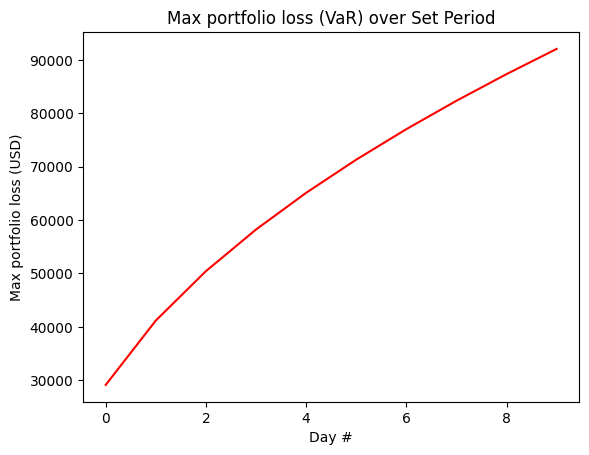

In [583]:
# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over Set Period")
plt.plot(var_array, "r");

In [584]:
# Calculate the Conditional Value at Risk (CVaR) at a 95% confidence level by first calculating the VaR and then taking the average of all losses that exceed the VaR
returns = np.random.normal(mean_investment, stdev_investment, size=10000) # Generate 10,000 sample returns from a normal distribution
losses = initial_investment - returns # Calculate the losses for each return
var_losses = losses[losses >= var_1d] # Select only the losses that exceed the VaR
cvar_1d = np.round(np.mean(var_losses), 2) # Calculate the average of the selected losses

# Print the 1-day CVaR
print("1-day CVaR @ 95% confidence: " + str(cvar_1d))

1-day CVaR @ 95% confidence: 36086.89


**VaR Annualized**

In [585]:
# Import the norm function from the scipy.stats module
from scipy.stats import norm

# Set the confidence level for the VaR calculation to 95%
conf_level = 0.05

In [586]:
# len(max_sharpe_weights)

In [587]:
expected_returns=exp_returns['Expected Return Annualized']

In [588]:
# Set initial investment - $1 million
initial_investment = 1000000

# Calculate the mean return of the portfolio using the weights that maximize the Sharpe ratio
port_mean = expected_returns.dot(max_sharpe_weights)

# Calculate the standard deviation of the portfolio using data from an annualized simulation
port_stdev = annualized_simulation_df.iloc[max_sharpe_ind, 1]

# Calculate the mean value of the investment
mean_investment = (1 + port_mean) * initial_investment

# Calculate the standard deviation of the investment
stdev_investment = initial_investment * port_stdev


In [589]:
# Calculate the cutoff value for the 95% confidence interval using the norm.ppf() function
cutoff = norm.ppf(conf_level, mean_investment, stdev_investment)

# Calculate the 1-day Value at Risk (VaR) at a 95% confidence level by subtracting the cutoff value from the initial investment
var_1y = initial_investment - cutoff

# # Print the 1-day VaR
# print("Annualized VaR @ 95% confidence: " + str(var_1y))

In [590]:
# Print the annualized VaR for the portfolio with max Sharpe Ratio in dollars
print(f"Annualized VaR (95% confidence) for the portfolio with max Sharpe Ratio: ${var_1y:.2f}")

Annualized VaR (95% confidence) for the portfolio with max Sharpe Ratio: $335306.37


**Portfolio Diversification**

In [591]:
returns=df.pct_change().dropna()

In [592]:
returns = returns.drop(columns='^GSPC')

In [593]:
# Calculate the correlation matrix
corr_matrix = returns.corr()

# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(z=corr_matrix.values, 
                                 x=corr_matrix.columns, 
                                 y=corr_matrix.columns,
                                 colorscale='ylgnbu'))

# Add text annotations to the heatmap
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        fig.add_annotation(x=corr_matrix.columns[i], 
                           y=corr_matrix.columns[j], 
                           text=np.round(corr_matrix.iloc[i, j], 2),
                           showarrow=False,
                           font=dict(color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')) # set text color based on correlation value

# Set the title and axis labels
fig.update_layout(title='Correlation Heatmap of Stock Returns',
                  xaxis_title='Stocks',
                  yaxis_title='Stocks')

# Show the figure
fig.show()

**Portfolio Beta**

In [594]:
# Extract the asset allocation weights for the portfolio with maximum Sharpe ratio
portweights=max_sharpe_weights
# len(portweights)

In [595]:
# Calculate the portfolio beta as the dot product of asset betas and allocation weights
port_beta=np.dot(betas,portweights)

In [596]:
# Print the calculated portfolio beta
print(f"The portfolio beta is {port_beta}")

The portfolio beta is 1.9561090958241494


**Global Minimum Variance Portfolio**

In [597]:
# exp_returns

In [598]:
# calculate the covariance matrix (annualized)
cov_mat = returns.cov() 
avg_returns = exp_returns['Expected Return Annualized']

In [599]:
# Calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_mat)

# Calculate the ones vector
ones = np.ones((n_equities, 1))

# Calculate the numerator of the weight equation
numerator = np.dot(inv_cov_matrix, ones)

# Calculate the denominator of the weight equation
denominator = np.dot(np.dot(ones.T, inv_cov_matrix), ones)

# Calculate the weights of the GMV portfolio with a lower bound of 0
gmv_weights = np.maximum(0, numerator / denominator)

# Normalize the weights
gmv_weights /= np.sum(gmv_weights)

# Calculate the portfolio returns using the GMV weights and the average daily returns of each equity
gmv_returns = np.dot(gmv_weights.T, avg_returns)

# Calculate the portfolio volatility using the GMV weights and the covariance matrix of the equity returns
gmv_volatility = np.sqrt(np.dot(gmv_weights.T, np.dot(cov_mat, gmv_weights)))

# Calculate the Sharpe ratio of the GMV portfolio
gmv_sharpe_ratio = gmv_returns / gmv_volatility

# Print the results
print("Results for Global Minimum Variance portfolio:")
print("Weights:")
for i, equity in enumerate(equities):
    print("{}: {:.2f}%".format(equity, gmv_weights[i][0] * 100))
print("Expected return: {:.2f}%".format(gmv_returns[0] * 100))
print("Volatility: {:.2f}%".format(float(gmv_volatility[0]) * 100))
print("Sharpe ratio: {:.2f}".format(float(gmv_sharpe_ratio[0])))


Results for Global Minimum Variance portfolio:
Weights:
VOO: 0.28%
TAN: 0.00%
VUG: 0.00%
SOXX: 3.35%
TECL: 1.55%
CURE: 6.12%
MA: 0.00%
UNH: 0.00%
IYE: 1.16%
NOW: 4.10%
AVGO: 47.21%
TMUS: 36.22%
Expected return: 8.49%
Volatility: 1.49%
Sharpe ratio: 5.70


**Allocation Analysis CXPY Optimization**

This code uses the CVXPY library to define and solve a portfolio optimization problem using convex optimization. The goal is to find the set of efficient portfolios on the efficient frontier that maximize expected return for a given level of risk. It defines the weights for each equity in the portfolio plus the risk-free asset and computes the expected portfolio returns and portfolio variance using the mean returns and covariance matrix of the equities. The optimization problem's objective is to maximize the expected portfolio returns minus a weighted sum of the portfolio variance and the risk-free rate, subject to constraints on the weights. The code then sets a range of gamma values to compute the efficient frontier, solves the optimization problem for each gamma value, and stores the resulting portfolio allocations, expected returns, and portfolio volatilities in a list. Finally, the code extracts the efficient frontier from the computed portfolios by creating two lists containing the portfolio volatilities and expected returns, respectively.

In [600]:
# Define the portfolio optimization problem
w = cp.Variable(n_equities+1) # weights for each equity in the portfolio plus the risk-free asset
ret = w[:-1] @ avg_returns # expected portfolio returns
risk = cp.quad_form(w[:-1], cov_mat) # portfolio variance
rf = cp.Parameter(nonneg=True) # risk-free rate
gamma = cp.Parameter(nonneg=True) # regularization parameter

objective = cp.Maximize(ret - rf * w[-1] - gamma * risk)
constraints = [cp.sum(w[:-1]) + w[-1] == 1, w[:-1] >= 0, w[-1] >= 0.1]

# Define a range of gamma values to compute the efficient frontier
n_points = 100
gamma_range = np.logspace(-2, 2, num=n_points)

# Set the risk-free rate
rf_value = risk_free_rate

# Solve the optimization problem for each gamma value
portfolios = []
for i in range(n_points):
    gamma.value = gamma_range[i]
    rf.value = rf_value
    problem = cp.Problem(objective, constraints)
    problem.solve()
    portfolios.append((np.sqrt(risk.value), ret.value, w.value))

# Extract the efficient frontier from the computed portfolios
portf_vol_cvx_ef = [p[0] for p in portfolios]
portf_rtn_cvx_ef = [p[1] for p in portfolios]




This code calculates the efficient frontier for a portfolio optimization problem using CVXPY library. It first converts the annualized average returns and the covariance matrix to numpy arrays. Then, it sets up the optimization problem with weights as the decision variable, where the objective function maximizes the expected portfolio return minus a weighted sum of the portfolio variance and the risk-free rate. The constraints are that the sum of weights equals one, weights for equities are non-negative, and the weight for the risk-free asset is at least 0.1. It then calculates the efficient frontier by solving the optimization problem for a range of gamma values, where gamma represents the risk-aversion parameter, and storing the resulting portfolio weights, expected returns, and portfolio volatilities in lists. Finally, it plots the weights allocation for different values of the risk-aversion parameter, showing the proportion of each equity in the portfolio for each level of risk-aversion. The plot helps investors to understand how the optimal portfolio changes as they become more or less risk-averse.

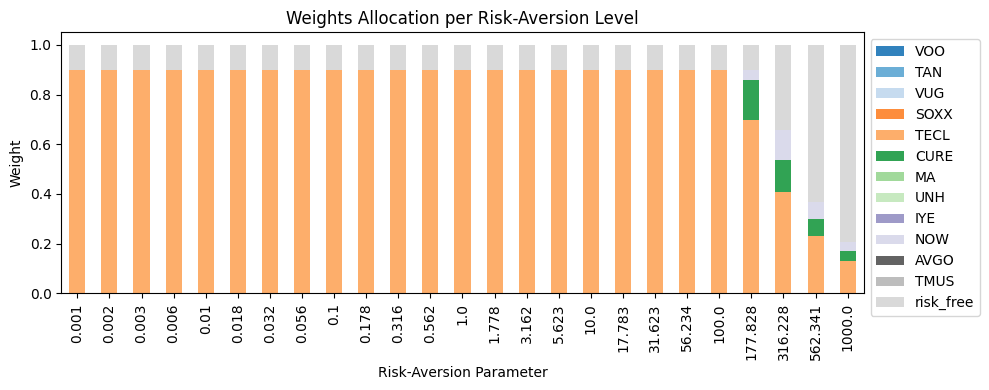

In [601]:
# Convert the annualized average returns and the covariance matrix to numpy arrays:
avg_returns = np.array(avg_returns)
cov_mat = np.array(cov_mat)

# Set up the optimization problem:
weights = cp.Variable(n_equities + 1)  # add 1 for the risk-free asset
gamma = cp.Parameter(nonneg=True)
portf_rtn_cvx = avg_returns @ weights[:-1]
portf_vol_cvx = cp.quad_form(weights[:-1], cov_mat)
objective_function = cp.Maximize(portf_rtn_cvx - gamma * portf_vol_cvx)
problem = cp.Problem(objective_function, [cp.sum(weights) == 1, weights[:-1] >= 0, weights[-1] >= 0.1])

# Calculate the Efficient Frontier:
N_POINTS = 25
portf_rtn_cvx_ef = np.zeros(N_POINTS)
portf_vol_cvx_ef = np.zeros(N_POINTS)
weights_ef = []
gamma_range = np.logspace(-3, 3, num=N_POINTS)

for i in range(N_POINTS):
    gamma.value = gamma_range[i]
    problem.solve()
    portf_vol_cvx_ef[i] = cp.sqrt(portf_vol_cvx).value
    portf_rtn_cvx_ef[i] = portf_rtn_cvx.value
    weights_ef.append(weights.value.copy())

# Plot the allocation for different values of the risk-aversion parameter:
weights_df = pd.DataFrame(weights_ef, columns=equities + ['risk_free'], index=np.round(gamma_range, 3))

ax = weights_df.plot(kind='bar', stacked=True, figsize=(10, 4), colormap='tab20c')
ax.set(title='Weights Allocation per Risk-Aversion Level',
       xlabel=r'Risk-Aversion Parameter',
       ylabel='Weight')
ax.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [602]:
# Print portfolio allocations and rate of return/volatility for each portfolio on the efficient frontier
for i, p in enumerate(portfolios):
    print("Portfolio", i+1, "allocations and performance:")
    print("Expected rate of return: {:.2f}%".format(p[1]*100))
    print("Volatility: {:.2f}%".format(p[0]*100))
    for j, asset in enumerate(equities):
        if abs(p[2][j]) > 1e-5:
            print(asset, ": {:.2f}%".format(p[2][j]*100))
    if abs(p[2][-1]) > 1e-5:
        print("Risk-free asset: {:.2f}%".format(p[2][-1]*100))
    print()


Portfolio 1 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%
TECL : 90.00%
Risk-free asset: 10.00%

Portfolio 2 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%
TECL : 90.00%
Risk-free asset: 10.00%

Portfolio 3 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%
TECL : 90.00%
Risk-free asset: 10.00%

Portfolio 4 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%
TECL : 90.00%
Risk-free asset: 10.00%

Portfolio 5 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%
TECL : 90.00%
Risk-free asset: 10.00%

Portfolio 6 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%
TECL : 90.00%
Risk-free asset: 10.00%

Portfolio 7 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%
TECL : 90.00%
Risk-free asset: 10.00%

Portfolio 8 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%

In [603]:
# Define desired rate of return
desired_return = 12.0  # Example: 10% return

# Print portfolio allocations and rate of return/volatility for each portfolio on the efficient frontier
for i, p in enumerate(portfolios):
    if p[1]*100 > desired_return:
        print("Portfolio", i+1, "allocations and performance:")
        print("Expected rate of return: {:.2f}%".format(p[1]*100))
        print("Volatility: {:.2f}%".format(p[0]*100))
        for j, asset in enumerate(equities):
            if abs(p[2][j]) > 1e-5:
                print(asset, ": {:.2f}%".format(p[2][j]*100))
        if abs(p[2][-1]) > 1e-5:
            print("Risk-free asset: {:.2f}%".format(p[2][-1]*100))
        print()


Portfolio 1 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%
TECL : 90.00%
Risk-free asset: 10.00%

Portfolio 2 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%
TECL : 90.00%
Risk-free asset: 10.00%

Portfolio 3 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%
TECL : 90.00%
Risk-free asset: 10.00%

Portfolio 4 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%
TECL : 90.00%
Risk-free asset: 10.00%

Portfolio 5 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%
TECL : 90.00%
Risk-free asset: 10.00%

Portfolio 6 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%
TECL : 90.00%
Risk-free asset: 10.00%

Portfolio 7 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%
TECL : 90.00%
Risk-free asset: 10.00%

Portfolio 8 allocations and performance:
Expected rate of return: 21.86%
Volatility: 2.49%